##  Bike-Rental-Demand-Perdiction


### Description:

Prediction of the number of bicycles rented in an hour of a day in the Seoul Bike Sharing System based on different weather conditions and holiday information in Seoul from 1/12/2017 to 30/11/2018

### Group members:

Mohammad Ahmadi, Zachary Huntley, Anurag Singh

### Dataset Description:

The dataset was downloaded from the https://archive-beta.ics.uci.edu/ website, which provides datasets for educational purposes. The dataset contains the number of bicycles rented per hour for each day from 1.12.2017 to 31.11.2018. The weather conditions for each hour are also specified in terms of Temperature (°C), Humidity (%), Wind speed (m/s), Visibility (10m), Dew point temperature (°C), Solar Radiation (MJ/m2), Rainfall (mm), Snowfall (cm), and Seasons. Holidays are specified for each day. As there were some days during which the Seoul Bike Sharing System was unable to provide service and no vehicle was rented, these days are shown in the Functioning Days column.


### Project Summary:
Seoul's bike sharing system, known as Ddareungi or Seoul Bike in English, was established in 2015 with 150 stations and 1500 bikes. Since then, the system has steadily expanded to cover new districts, and as of July 2016, there were approximately 300 stations and 3000 bikes available.

One of the biggest obstacles to the success of bike sharing systems is cost. The high cost of maintaining and renewing bicycles can lead to high rental costs for customers or a large budget for municipalities, which can hinder the popularity of such an environmentally-friendly system in cities. Additionally, inaccessibility is another challenge faced by users in cities with bike sharing systems, as stations may not have enough bicycles to meet demand during certain hours, which can negatively impact the popularity of the system.

Bike sharing systems allow users to rent a bike from one station and return it to another station or simply leave it anywhere they please. In order to ensure that the system functions smoothly, providers must facilitate the relocation of abandoned bicycles to stations, which requires costly infrastructure and human resources. Predicting the number of bicycles needed can help to minimize the cost of relocations.

Furthermore, minimizing the number of bicycles stored in stations can protect the vehicles from different weather conditions and reduce maintenance costs, which can increase their lifespan and generate revenue for the system. Ultimately, accurately predicting the number of bicycles needed on an hourly basis each day can help the system balance supply and demand, leading to better service for customers.

As weather conditions play an important role in bike usage, this project surveys the forecasting of the number of bicycles needed each hour based on weather patterns.
 
### Methodology:

Linear and non linear regression including Linear Regressor, Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor

#### Data Description:

- Date : DD/MM/YYY
- Rented_Bike_Count: the total number of rented bike for each hour
- Hour: hour of the day
- Temperature(°C): temperature measured in Celsius(°C)
- Humidity(%): humidity in percent 
- Wind_speed(m/s): the speed of winf in m/s
- Visibility_(10m): measure of the transparency of the surrounding air
- Dewpoint_temperature(°C): dew point is the temperature to which air must be cooled to become saturated with water vapor in Celsius
- Solar_Radiation_(MJ/m2):  MJ/m2
- Rainfall(mm): in millimeter 
- Snowfall(cm): in centimeter 
- Seasons: Spring, Summer, Autumn,  Winter
- Holiday: Holiday or No holiday
- Functioning_Day: it shows that if the system were working or not. Yes or No

#### Libraries: 

Pandas, NumPy, Matplotlib, seaborn, Scikit Learn

#### Step to follow:
Data preparation

Visualization and Feature Engineering

Modeling and Evaluation

HyperParameter Tuning

## libraries


### Iporting neccesary libraries

In [1]:
import pandas as pd
import numpy as np     
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')


### A brief explanation of libraries


- NumPy: A library that provides support for large, multi-dimensional arrays and matrices.


- Pandas: An open-source library used for analyzing and manipulating data, including data cleaning and exploration.


- Seaborn: A visualization library used for creating statistical graphics plots based on matplotlib.


- Matplotlib: A comprehensive library used for creating static, animated, and interactive visualizations.


- %matplotlib inline: A line-oriented magic command that makes the output of plotting commands displayed directly below the code cell that produced it.


- Pyplot: A collection of functions used to make matplotlib work like MATLAB.


- Scikit-learn (sklearn): A simple and efficient library used for predictive data analysis. Built on NumPy, SciPy, and Matplotlib.


- Linear_model: A package from Scikit-learn used to fit a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation.


- Scikit-learn.ensemble: A package from Scikit-learn used to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability or robustness over a single estimator.


- Scikit-learn.metrics: The Scikit-learn.metrics module includes score functions, performance metrics, pairwise metrics, and distance computations.


- Scikit-learn.preprocessing: The Scikit-learn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.


- SVM, KNeighborsRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, DecisionTreeRegressor, Ridge, Lasso, LinearRegression, and LogisticRegression are different methods for prediction that we used from Scikit-learn libraries.

## Loading the dataset

In [2]:
#import the csv file
df = pd.read_csv('Bike.csv', encoding= 'unicode_escape')

## Exploratory Data Analysis

### Shape of the dataset

In [3]:
df.shape

(8760, 14)

- The dataset contains 8760 rows and 14 columns

### Dataset Sapmle

In [4]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- First 5 rows of our dataset are shown above

In [5]:
df.tail()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


- Last 5 rows of our dataset are shown above

### Data types

In [6]:
df.dtypes

Date                         object
Rented_Bike_Count             int64
Hour                          int64
Temperature(°C)             float64
Humidity(%)                   int64
Wind_speed(m/s)             float64
Visibility_(10m)              int64
Dewpoint_temperature(°C)    float64
Solar_Radiation_(MJ/m2)     float64
Rainfall(mm)                float64
Snowfall(cm)                float64
Seasons                      object
Holiday                      object
Functioning_Day              object
dtype: object

- The type of each column is as above table. Date is currently an object and should be changed to date type. Holiday, Seasons, and Functioning_day are our categorical features that can be changed to category type.

### Detailed information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented_Bike_Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(°C)           8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind_speed(m/s)           8760 non-null   float64
 6   Visibility_(10m)          8760 non-null   int64  
 7   Dewpoint_temperature(°C)  8760 non-null   float64
 8   Solar_Radiation_(MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall(cm)              8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning_Day           8760 non-null   object 
dtypes: float

- It shows that the index ranges from 0 to 8759 rows, with a total of 14 columns. There are no null values in the mentioned columns of the data, and the memory used for the dataset is 958.2 KB. 

### Unique values

In [8]:
df.nunique()

Date                         365
Rented_Bike_Count           2166
Hour                          24
Temperature(°C)              546
Humidity(%)                   90
Wind_speed(m/s)               65
Visibility_(10m)            1789
Dewpoint_temperature(°C)     556
Solar_Radiation_(MJ/m2)      345
Rainfall(mm)                  61
Snowfall(cm)                  51
Seasons                        4
Holiday                        2
Functioning_Day                2
dtype: int64

- The number of unique values for each column is as above table. For categorical features, Seasons can take the values of Spring, Summer, Autumn, and Winter. Holiday can take the values of Holiday or No Holiday, and Functioning_Day can take the values of Yes or No.

### Statistical information

In [9]:
df.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- The statistical information, including average, standard deviation, minimum, maximum, median, and the first and last quartiles, for our numeric features, is shown. 

## Data Preparation

### Changing Data Type

In [10]:
df['Date']=pd.to_datetime(df.Date)
df['Seasons']=df.Seasons.astype('category')
df['Holiday']=df.Holiday.astype('category')
df['Functioning_Day']=df.Functioning_Day.astype('category')

- The type of the Date column has been changed to datetime, and the other three columns have been changed to category type.

### Missing value

In [11]:
df.isnull().sum()

Date                        0
Rented_Bike_Count           0
Hour                        0
Temperature(°C)             0
Humidity(%)                 0
Wind_speed(m/s)             0
Visibility_(10m)            0
Dewpoint_temperature(°C)    0
Solar_Radiation_(MJ/m2)     0
Rainfall(mm)                0
Snowfall(cm)                0
Seasons                     0
Holiday                     0
Functioning_Day             0
dtype: int64

- As described before, there is no null value. 

In [12]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Renaming features

In [13]:
# create a dictionary with the old and new column names
new_names = {'Rented_Bike_Count': 'Count', 'Temperature(°C)': 'Tem', 'Humidity(%)': 'Hum', 'Wind_speed(m/s)': 'Wind',
             'Visibility_(10m)': 'Vis','Dewpoint_temperature(°C)': 'DeTem','Solar_Radiation_(MJ/m2)': 'Sol','Rainfall(mm)': 'Rain',
             'Snowfall(cm)': 'Snow', 'Functioning_Day': 'Func'}

# rename the columns using the rename() method with the dictionary
df = df.rename(columns=new_names)


- To better work with columns and avoid mistyping column names in our queries, the column names have been changed as shown above.

#### cheking dataset

In [14]:
df.head()

,Date,Count,Hour,Tem,Hum,Wind,Vis,DeTem,Sol,Rain,Snow,Seasons,Holiday,Func
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Visualization and Feature Engineering

### Features reduction

#### chechking Count  for functional and non functional days

<AxesSubplot:xlabel='Func', ylabel='Count'>

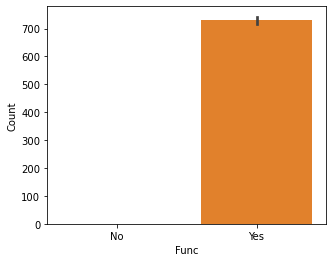

In [15]:
plt.figure(figsize=(5,4))
sns.barplot(x='Func',y='Count',data=df)

- The number of rented bikes on days when the bike sharing system was not functioning is zero, as the system was completely offline during those days. Therefore, the rows with zero counts of rented bikes, as well as the corresponding column, can be deleted. 

#### Droping unusefull rows and Func column

In [16]:
#Deleting rows of non functional days 
df=df.drop(df[df['Func'] == 'No'].index) 

In [17]:
#Deleting Func Column as it is not usefull anymore
df=df.drop(['Func'], axis = 1)

#### chechking Count for Seasons

<AxesSubplot:xlabel='Seasons', ylabel='Count'>

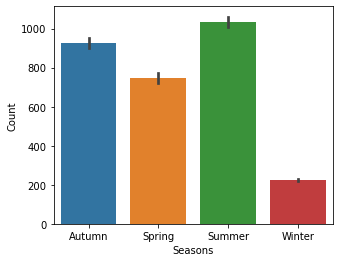

In [18]:
plt.figure(figsize=(5,4))
sns.barplot(x='Seasons',y='Count',data=df)

- Winter has the lowest bike rental average, while summer has the highest. It should be noted that the default aggregation function used by the sns.barplot is mean.

#### chechking Count for Holidays


<AxesSubplot:xlabel='Holiday', ylabel='Count'>

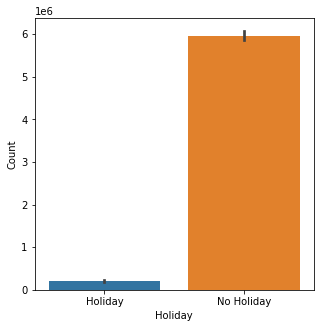

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='Holiday',y='Count', data=df, estimator=sum)

- the sum of rented bikes for non holiday days are considerably more than the amount for holidays. So we can check it more

<AxesSubplot:xlabel='Hour', ylabel='Count'>

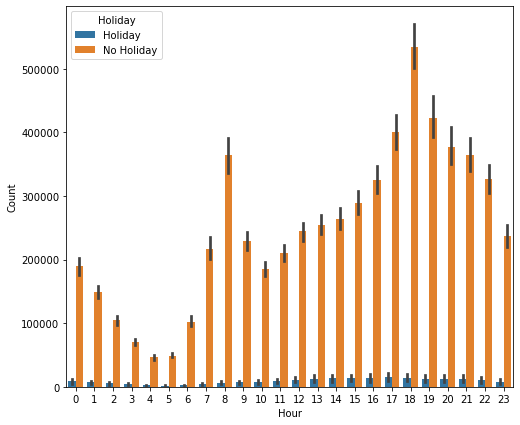

In [20]:
plt.figure(figsize=(8,7))
sns.barplot(x='Hour',y='Count',hue = 'Holiday', data=df, estimator=sum)

<AxesSubplot:xlabel='Seasons', ylabel='Count'>

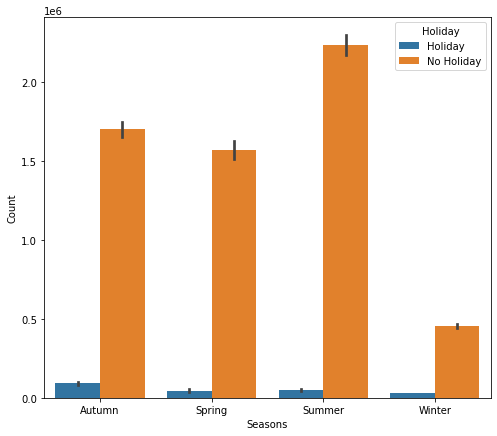

In [21]:
plt.figure(figsize=(8,7))
sns.barplot(x='Seasons',y='Count',hue = 'Holiday', data=df, estimator=sum)

- It is clear that the difference in the total amount of rented bikes between holidays and non-holidays is considerable and may reduce the precision of our regression model in the next steps. We can either drop the values and then the column of Holiday or group our data by this feature, but as it may make our analysis more complicated for now, we will continue with this feature.

#### Dropping The Date

- as the feature of Date can not affect our prediction of rented bike we should drop the date

In [22]:
df=df.drop(['Date'], axis = 1)

#### Correlation

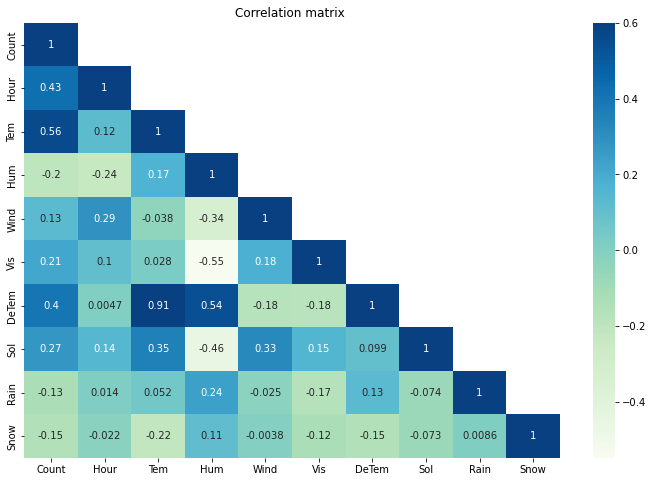

In [23]:
# finding the correlation of numerical variables
corr = df.corr()

#Deleting the half of the plot as it is replication of other half 
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False


#Heat map for Visualization of attributes correlation
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr, mask=mask, vmax=0.6, annot=True, ax=ax, cmap='GnBu', )
ax.set_title('Correlation matrix ')
plt.show()


- As the heatmap shows, the Tem (Temperature) and DeTem (Dewpoint Temperature) are highly correlated, we can drop one of them

In [24]:
df=df.drop(['DeTem'], axis = 1)

#### Checking the dataset

In [25]:
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


In [26]:
df.shape

(8465, 11)

### Outliers

#### Boxplots

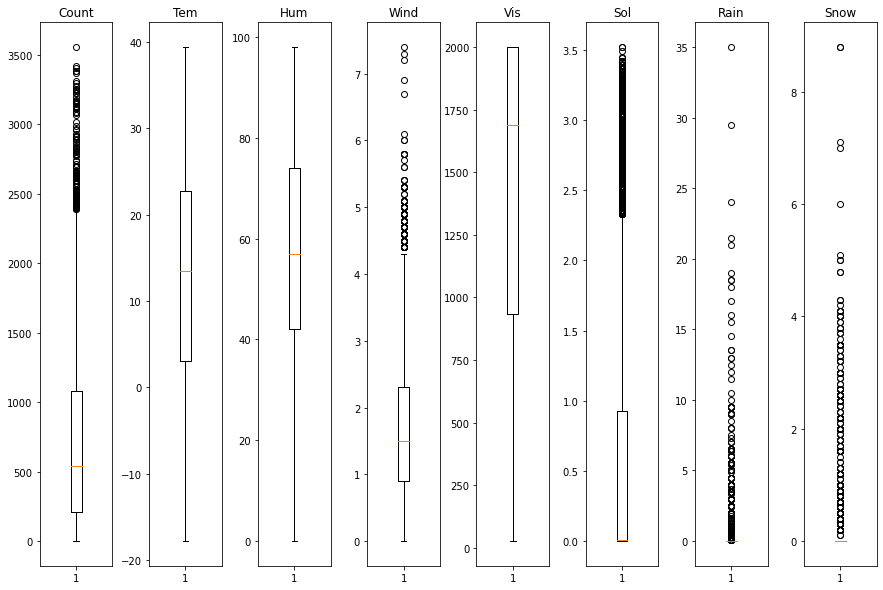

In [27]:
Outliers = df[['Count','Tem','Hum','Wind','Vis','Sol','Rain','Snow']]
# create a figure with 5 subplots
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(15, 10))

# create a box plot for each feature
for i, feature in enumerate(Outliers.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show the plots
plt.show()







- Boxplots demonstrate that the features Count, Wind, Rain, and Snow have outlier values. These outliers may affect the accuracy of our analysis and subsequent regression models. Therefore, we should impute these outlier values with the median or mean, depending on the skewness or distribution of each feature.

#### Histogram for checking distribution

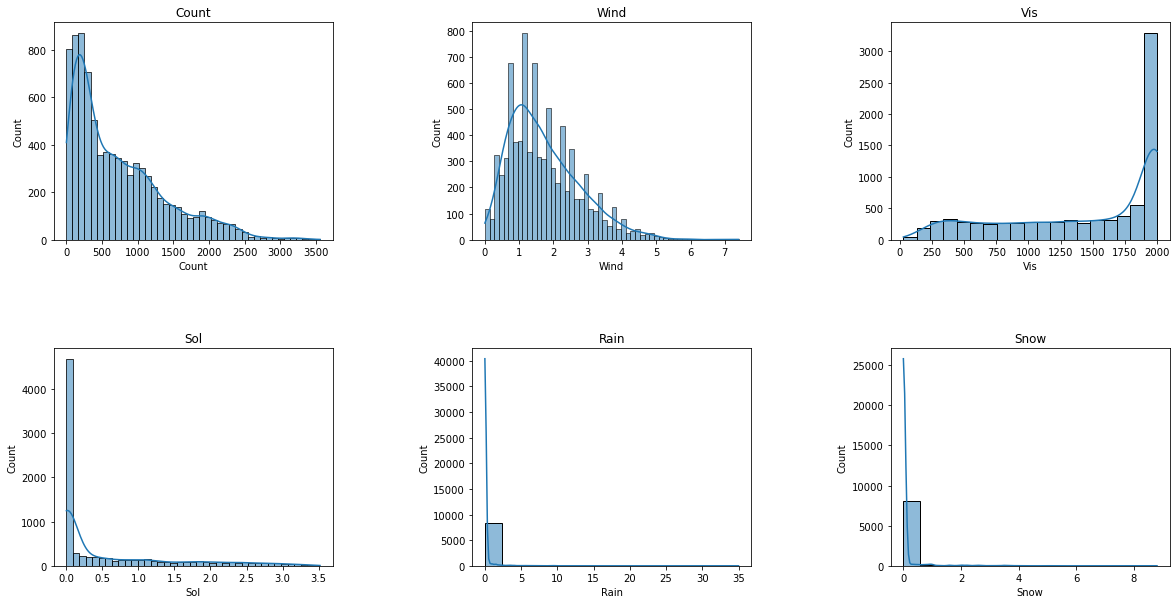

In [27]:
Outliers = df[['Count','Wind','Vis','Sol','Rain','Snow']]
# create a figure with 5 subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# create a distribution plot for each feature
for i, feature in enumerate(Outliers.columns):
    sns.histplot(df[feature], kde=True, ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(feature)

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

- Given the high skewness of our features, any removal or alteration of values based on the first and third quartiles could greatly impact the distribution's skewness and the accuracy of our analysis. Therefore, it is advisable to simply impute values that are significantly different from others.

#### Deleting extrime values of columns

In [29]:
df = df.query('(Count < 3400) and (Wind < 6.5 ) and (Rain < 25) and (Snow < 6.5) ')

- According to the boxplots, the upper limit of Count was considered to be 3400, while the values of 6.5, 25, and 6.5 were considered for Wind, Rain, and Snow, respectively.

#### Checking the dataset

In [28]:
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


In [29]:
df.shape

(8465, 11)

### One-hot Encoding

In [30]:
#Encode the categorical features to numeric by getting dummy variables

df = pd.get_dummies(df)
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1


- Categorical features, Seasons and Holiday, are turned to dummy numeric variables

### features and Target variable 

In [31]:
X = df.drop('Count',axis=1)
y = df['Count']

### Normalization of features

- Normalization of features is the process of scaling the values of different features of a dataset to a common scale, typically between 0 and 1 or -1 and 1. This is done to ensure that each feature contributes equally to the analysis and to prevent features with larger values from dominating the analysis.

- Normalization is particularly important in machine learning algorithms that use distance-based metrics, such as k-nearest neighbors or clustering, because features with larger values will dominate the distance calculation. By normalizing the features, we can ensure that all features contribute equally to the distance calculation.

- There are several ways to normalize features, including min-max scaling, z-score scaling, and log scaling. Min-max scaling involves scaling the values to a range between 0 and 1 based on the minimum and maximum values of the feature

In [32]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data frame
normalized_data = scaler.fit_transform(X)

# create a new data frame with the normalized data
X = pd.DataFrame(normalized_data, columns=X.columns)

In [33]:
X.head()

,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,0.000000,0.220280,0.377551,0.297297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.043478,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.086957,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.130435,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.173913,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Count, dtype: int64

### Training and Testing Set

In [35]:
#Split the dataset into the train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5925, 14) (2540, 14) (5925,) (2540,)


## Modeling and Evaluation

### Evaluation Metrics Description

- R-squared (R²) is a statistical metric that measures the proportion of the variation in the dependent variable that is explained by the independent variables in a regression model. It ranges between 0 and 1, where 1 indicates a perfect fit between the model and the data.

- Adjusted R-squared (adjusted R²) is a modification of the R² metric that adjusts for the number of predictors in the model. It penalizes the R² value for including predictors that do not significantly improve the model's performance. This metric is particularly useful when comparing models with different numbers of predictors.

- Mean squared error (MSE) is a metric that measures the average of the squared differences between the actual and predicted values in a regression model. It provides an estimate of the variance of the errors in the model and is useful in assessing the overall quality of the model's predictions.

- Root mean squared error (RMSE) is the square root of the mean squared error and is a more interpretable measure of the error in the model's predictions. It is expressed in the same units as the dependent variable and provides an estimate of the average magnitude of the errors in the model. The lower the RMSE, the better the model's performance.

### Linear Regression

R^2 train: 0.5370050111572069
R^2 test: 0.5513010287063553
Adjusted R^2: 0.5488131928259153
RMSE: 424.18641673411975


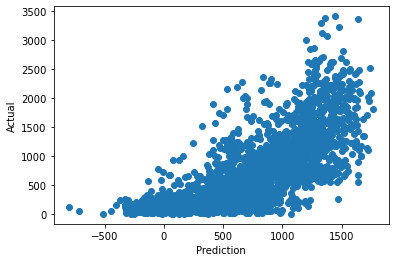

In [39]:
LR = LinearRegression().fit(X_train,y_train)
y_pred=LR.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(f'R^2 train: {LR.score(X_train,y_train)}\nR^2 test: {LR.score(X_test,y_test)}\nAdjusted R^2: {1-((1-LR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

This linear regression model has an R-squared value of 0.54 on the training data, which means that 54% of the variability in the target variable (rented bike count) can be explained by the predictor variables. The R-squared value on the test data is 0.55, which indicates that the model is generalizing well and is not overfitting to the training data. However, as both values are low, the model is underfitting.

The adjusted R-squared value of 0.55 suggests that the model is performing reasonably well in accounting for the variance in the target variable.

The root mean squared error (RMSE) of 424.19 indicates that the average difference between the predicted and actual values of the target variable is 424.19. This value can be used as a measure of the accuracy of the model. 

### Decision Tree Regressor

R^2 train: 1.0
R^2 test: 0.7689730817744211
Adjusted R^2: 0.7676921404456456
RMSE: 304.376075399481


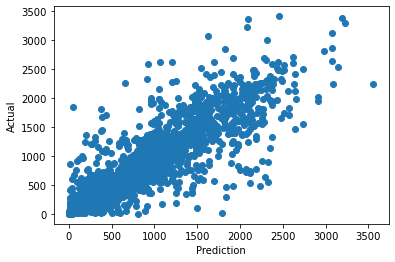

In [59]:
DTR = DecisionTreeRegressor().fit(X_train,y_train)
y_pred=DTR.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(f'R^2 train: {DTR.score(X_train,y_train)}\nR^2 test: {DTR.score(X_test,y_test)}\nAdjusted R^2: {1-((1-DTR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

The decision tree regressor model seems to be overfitting, as it has a perfect R^2 score on the training set but a lower R^2 score on the test set compared to the linear regression model.

The R^2 score for the test set is 0.767, which indicates that the model explains about 77% of the variance in the target variable. However, the adjusted R^2 score is slightly lower than the linear regression model, which means that the decision tree model may not be as good at accounting for the number of predictors in the model.

The RMSE for the decision tree model is lower than the linear regression model, which indicates that the decision tree model has a better predictive performance on the test set.

Overall, the decision tree model may perform better on the test set, but it is important to be cautious about overfitting and carefully tune the hyperparameters to improve the generalization performance of the model.

### Random Forest Regressor

R^2 train: 0.9814799589680446
R^2 test: 0.8651382782637775
Adjusted R^2: 0.8643905301036559
RMSE: 232.55386964319388


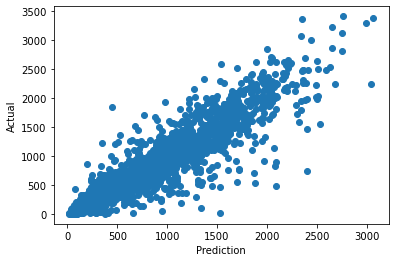

In [41]:
RFR = RandomForestRegressor().fit(X_train,y_train)
y_pred=RFR.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(f'R^2 train: {RFR.score(X_train,y_train)}\nR^2 test: {RFR.score(X_test,y_test)}\nAdjusted R^2: {1-((1-RFR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

The Random Forest regressor model outperformed the linear and decision tree models with the highest R^2 value of 0.8651 and the lowest RMSE value of 232.55.

The R^2 value of the Random Forest model is much higher than the linear and decision tree models, indicating that the Random Forest model explains more of the variance in the data. The RMSE value of the Random Forest model is also much lower than the linear and decision tree models, indicating that the Random Forest model has a smaller error between predicted values and actual values.

Overall, the Random Forest model seems to be the better model in comparison two Linear and Decision Tree Regressor Model. But it steel suffer from overfitting the train data 

### Gradient Boosting Regressor

R^2 train: 0.8658705224834695
R^2 test: 0.8432328028573696
Adjusted R^2: 0.8423635985959848
RMSE: 250.7302982862721


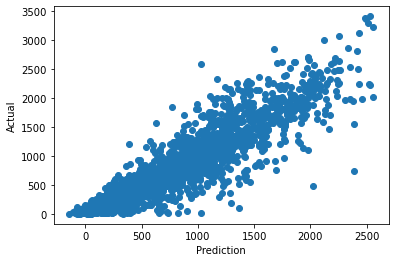

In [43]:
GBR = GradientBoostingRegressor().fit(X_train,y_train)
y_pred=GBR.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(f'R^2 train: {GBR.score(X_train,y_train)}\nR^2 test: {GBR.score(X_test,y_test)}\nAdjusted R^2: {1-((1-GBR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

The Gradient Boosting Regressor achieved an R^2 score of 0.866 on the training data and 0.843 on the test data, indicating good performance. The Adjusted R^2 score was 0.842, and the RMSE was 250.735. Compared to the other models, the Random Forest Regressor performed the best, followed by the Gradient Boosting Regressor, while the Linear Regression and Decision Tree Regressor had the lowest performance scores.

R^2 train: 0.8601565992495329
R^2 test: 0.7971420014528399
Adjusted R^2: 0.7960172442331724
RMSE: 285.2169219505202


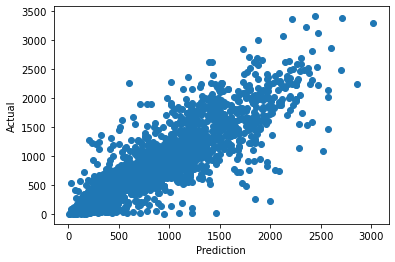

In [62]:
KNR = KNeighborsRegressor().fit(X_train,y_train)
y_pred=KNR.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(f'R^2 train: {KNR.score(X_train,y_train)}\nR^2 test: {KNR.score(X_test,y_test)}\nAdjusted R^2: {1-((1-KNR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

 ## HyperParameter Tuning

- Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance. This involves searching through a range of hyperparameters and selecting the combination that yields the best results. Grid search, random search, and Bayesian optimization are popular methods for hyperparameter tuning.
- Grid search cross-validation is a method used to select the best hyperparameters for a machine learning model. It involves creating a grid of hyperparameter combinations and training and evaluating the model using each combination through cross-validation.

- The cross-validation step helps to prevent overfitting and provides an estimate of the model's performance on unseen data. The hyperparameter combination with the best performance score is selected as the optimal hyperparameters for the model.

### Grid Search Cross-Validation